Loaded 35080 records from last 7 days
['Very Early', 'Slightly Early', 'On Time', 'Slightly Late', 'Late', 'Very Late']
[np.int64(3295), np.int64(14694), np.int64(4563), np.int64(4534), np.int64(3771), np.int64(3236)]


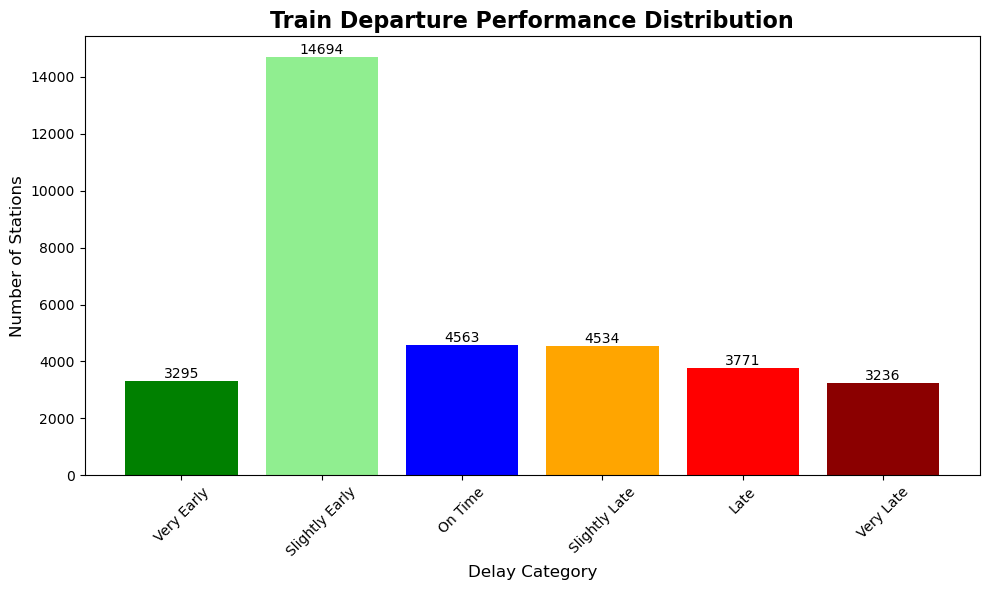

Very Early percentage: 9.7%
Slightly Early percentage: 43.1%
On Time percentage: 13.4%
Slightly Late percentage: 13.3%
Late percentage: 11.1%
Very Late percentage: 9.5%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from automated_collection import HistoricalDataManager

historical_data_collector = HistoricalDataManager()


stations_df = historical_data_collector.get_historical_data()

# Data visualization from recent_data_visualiztion notebook.
plt.figure(figsize=(10, 6))
delay_bins = [-60, -5, 5, 15, 30, 60, 999]
delay_labels = ['Very Early', 'Slightly Early', 'On Time', 'Slightly Late', 'Late', 'Very Late']
delay_colors = ['green', 'lightgreen', 'blue', 'orange', 'red', 'darkred']
stations_df['delay_category'] = pd.cut(
  stations_df['departure_delay_minutes'], 
  bins=delay_bins, 
  labels=delay_labels
)
delay_counts = stations_df['delay_category'].value_counts()
ordered_categories = delay_labels
ordered_counts = [delay_counts.get(category, 0) for category in ordered_categories]

print(ordered_categories)
print(ordered_counts)
bars = plt.bar(ordered_categories, ordered_counts, color=delay_colors)
plt.title('Train Departure Performance Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Delay Category', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.xticks(rotation=45)
for bar, count in zip(bars, ordered_counts):
  x_position = bar.get_x() + bar.get_width()/2.
  y_position = count + 0.5
  plt.text(x_position, y_position, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

delay_counts_sum = delay_counts.sum()
for category, count in zip(ordered_categories, ordered_counts):
  print(f"{category} percentage: {round(count/delay_counts_sum*100,1)}%")


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

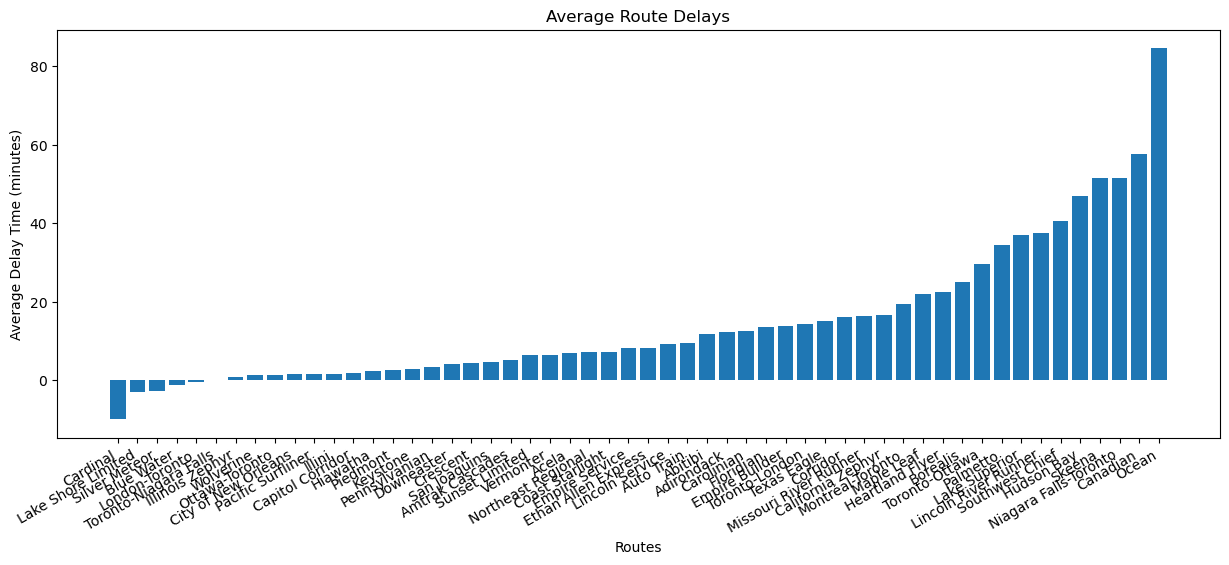

In [2]:
# More code from recent_data_visualization

route_delays = stations_df.groupby('route_name')['departure_delay_minutes'].agg(['mean', 'count'])
route_delays = route_delays[route_delays['count'] >= 5]
route_delays = route_delays.sort_values(by='mean')
# print(route_delays)


plt.figure(figsize=(15, 6))
plt.bar(route_delays.index, route_delays['mean'])
plt.title('Average Route Delays')
plt.xlabel('Routes')
plt.ylabel('Average Delay Time (minutes)')
plt.gcf().autofmt_xdate()

plt.plot